<a href="https://colab.research.google.com/github/Iblouse/Type2Diabetes/blob/main/Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part II: MODELING

#### Our goal is to build a risk prediction models of type 2 Diabetes (in this case Diabetes is POSITIVE, No Diabetes is NEGATIVE) based on Survey data (2018 BRFSS Survey Data). 

We have to make a value judgement here between false classifications
- the cost of labeling a no Diabetes as Diabetes and
- the cost of missing an actual positive of Diabetes

In Sick patient detection, we need to optimize for Sensitivity(Recall) because
- FALSE(ly) predicted as POSITIVEs are more acceptable than
- FALSE(ly) predicted as NEGATIVEs        

Sesitivity (Recall) is a good measure to determine when there is a high cost associated with FALSE NEGATIVE

In our case we will not use accuracy for model selection, but recall, f1, AUC because our data are imbalanced

#### In this part of the project we will use the dataset we saved at the end of part I DiabetesT2.csv.
I will use pipeline for part II, because pipelines allow us to streamline this process by compiling the preparation steps while easing the task of model tuning and monitoring.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
sns.set()

##### Reading the dataset

In [ ]:
df = pd.read_csv('DiabetesT2.csv')

In [ ]:
# Previewing the dataset
df.head()

,Focused,CardioVasc,KidneyDis,Sex,Race,MaritalStatus,Insurance,MedAffordability,Flushot,Depression,...,AgeGrp,Sleep,LastVCat,BMI,PCP,Stroke,Asthma,RmTeeth,Metrop,Diabetes
0,No,No,No,Female,White,Widowed,Coverage,NotAfford,Yes,No,...,Eighties & up,Normal,Within a year,Normal,Yes,No,No,1 to 5,No,No
1,No,No,No,Female,White,Widowed,Coverage,NotAfford,Yes,Yes,...,Seventies,Normal,Within a year,Over Weight,Yes,Yes,No,None,No,Yes
2,No,No,No,Male,White,Divorced,Coverage,NotAfford,Yes,No,...,Sixties,NotEnough,Within a year,Over Weight,Yes,No,No,1 to 5,Yes,No
3,No,No,No,Female,White,Married,Coverage,NotAfford,Yes,No,...,Seventies,Normal,Within a year,Normal,Yes,No,No,None,Yes,No
4,No,No,No,Male,White,Married,Coverage,NotAfford,No,No,...,Fifties,NotEnough,Within a year,Over Weight,Yes,No,No,None,No,Yes


In [ ]:
df.shape

(246687, 30)

In [ ]:
df['Diabetes'].value_counts()

No     206904
Yes     39783
Name: Diabetes, dtype: int64

##### We have 16.13% Positive cases and 83.87% of Negative cases

### Preparing the datasets for Machine Learning - Encoding ordinal and categorical variables

In [ ]:
# Converting the target variable to dummy variable
df['Diabetes'] = pd.get_dummies(df[['Diabetes']], drop_first=True)
df.head()

,Focused,CardioVasc,KidneyDis,Sex,Race,MaritalStatus,Insurance,MedAffordability,Flushot,Depression,...,AgeGrp,Sleep,LastVCat,BMI,PCP,Stroke,Asthma,RmTeeth,Metrop,Diabetes
0,No,No,No,Female,White,Widowed,Coverage,NotAfford,Yes,No,...,Eighties & up,Normal,Within a year,Normal,Yes,No,No,1 to 5,No,0
1,No,No,No,Female,White,Widowed,Coverage,NotAfford,Yes,Yes,...,Seventies,Normal,Within a year,Over Weight,Yes,Yes,No,None,No,1
2,No,No,No,Male,White,Divorced,Coverage,NotAfford,Yes,No,...,Sixties,NotEnough,Within a year,Over Weight,Yes,No,No,1 to 5,Yes,0
3,No,No,No,Female,White,Married,Coverage,NotAfford,Yes,No,...,Seventies,Normal,Within a year,Normal,Yes,No,No,None,Yes,0
4,No,No,No,Male,White,Married,Coverage,NotAfford,No,No,...,Fifties,NotEnough,Within a year,Over Weight,Yes,No,No,None,No,1


#### Importing necessary libraries

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.datasets import fetch_openml
import warnings

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.kernel_approximation import RBFSampler
from sklearn.neighbors import NearestNeighbors
from sklearn import svm
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import mutual_info_classif
from numpy import mean

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, auc, plot_roc_curve, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import fbeta_score, precision_score, recall_score, accuracy_score
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler

#### Splitting the dependent variable from the independent variables

In [ ]:
X = df.drop(['Diabetes'], axis = 1)
y = df['Diabetes']

#### Splitting the data into training and test data for both dependent and independent variables

In [ ]:
X1_train, X_test, y1_train, y_test = train_test_split(X, y, train_size = .7, random_state=0)

#### Resampling the data using undersampling method, because our data is imbalanced

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
randUS = RandomUnderSampler(random_state=0)
X_train, y_train = randUS.fit_resample(X1_train, y1_train)
X_train.shape

(55770, 29)

In [ ]:
X_train.head()

,Focused,CardioVasc,KidneyDis,Sex,Race,MaritalStatus,Insurance,MedAffordability,Flushot,Depression,...,PhysicalHealth,AgeGrp,Sleep,LastVCat,BMI,PCP,Stroke,Asthma,RmTeeth,Metrop
0,No,No,No,Female,White,Widowed,NoCoverage,Afford,No,No,...,1-13 Bad days,Fourties,NotEnough,Within 2 years,Over Weight,Yes,No,No,All,No
1,No,Yes,No,Male,White,Widowed,Coverage,NotAfford,No,No,...,0 Bad days,Eighties & up,Normal,Within a year,Over Weight,Yes,No,No,None,Yes
2,No,No,No,Male,White,Married,Coverage,NotAfford,Yes,No,...,0 Bad days,Eighties & up,NotEnough,Within a year,Obese,Yes,No,No,6 or more,No
3,No,No,No,Female,White,Married,Coverage,NotAfford,Yes,Yes,...,1-13 Bad days,Seventies,Normal,Within a year,Obese,Yes,No,Yes,1 to 5,No
4,No,Yes,No,Male,White,Married,Coverage,NotAfford,Yes,No,...,0 Bad days,Sixties,NotEnough,Within a year,Over Weight,Yes,No,No,None,No


##### This function get names features from columntransformer

In [ ]:
# Function by Johannes Haupt, I got it from his blog 
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

#### Preparing the variables for ordinal and categorical encoding using ColumnTransformer

In [ ]:
# Ordinal values to be encoded
ordinalV = [['NotEnough', 'Normal', 'OverSleep'], ['Thirties', 'Fourties', 'Fifties','Sixties', 'Seventies', 'Eighties & up'],
          ['Within a year', 'Within 2 years', 'Within 3 & up'], ['0 Bad days', '1-13 Bad days', '14+ Bad days'], 
          ['< $25000', '< $50000', '> $50000'], ['No HS or GED', 'HS-GED or Some College', 'College Grad+'],
           ['Under weight', 'Normal', 'Over Weight', 'Obese'],  ['None','1 to 5', '6 or more', 'All']]

# Ordinal columns
ordinalF = ['Sleep', 'AgeGrp', 'LastVCat', 'PhysicalHealth', 'Income', 'EducationLevel', 'BMI',  'RmTeeth']

# Categorical columns
categoricalF = ['Focused','CardioVasc','KidneyDis', 'Sex', 'Race','Insurance','MedAffordability', 'Flushot','Depression','Housing',
                'PartExercise', 'Vision', 'PCP', 'Stroke', 'GenHealth', 'Asthma', 'COPD']

In [ ]:
# Applying columns transformation
preprocessor = ColumnTransformer(transformers = [ ('onehot',OneHotEncoder(handle_unknown='ignore'), categoricalF),
                                      ('ordinal',OrdinalEncoder(categories=ordinalV), ordinalF)])

##### Standardizing features

In [ ]:
scaler = StandardScaler()

#### Making a pipeline for data transformation, select features, and standardize it

In [ ]:
pipe = Pipeline(steps = [ ('preprocessor', preprocessor), ('classifier', SelectKBest(score_func = mutual_info_classif, k= 'all')), 
                         ('scaler', StandardScaler())])

#### Fitting the pipeline

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Focused', 'CardioVasc',
                                                   'KidneyDis', 'Sex', 'Race',
                                                   'Insurance',
                                                   'MedAffordability',
                                                   'Flushot', 'Depression',
                                                   'Housing', 'PartExercise',
                                                   'Vision', 'PCP', 'Stroke',
                                                   'GenHealth', 'Asthma',
                                                   'COPD']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['NotEnough',
        

In [ ]:
# Getting feature name from the encoding transformation
name = get_feature_names(preprocessor)

<ipython-input-18-0c66dab479f6>:31: UserWarning: Transformer ordinal (type OrdinalEncoder) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


##### Feature Selection

In [ ]:
# prepare input data
def prepare_inputs(X_train, X_test):
    preprocessor.fit(X_train)
    X_train_e = preprocessor.transform(X_train)
    X_test_e = preprocessor.transform(X_test)
    return X_train_e, X_test_e

In [ ]:
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func = mutual_info_classif, k = 'all')
    fs.fit(X_train, y_train)    
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [ ]:
X_train_e, X_test_e = prepare_inputs(X_train, X_test)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_e, y_train, X_test_e)

#df_scores
feat = []
#what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    feat.append(fs.scores_[i])

Feature 0: 0.009722
Feature 1: 0.004035
Feature 2: 0.022225
Feature 3: 0.019915
Feature 4: 0.019970
Feature 5: 0.015948
Feature 6: 0.007531
Feature 7: 0.001706
Feature 8: 0.004890
Feature 9: 0.001910
Feature 10: 0.001718
Feature 11: 0.006469
Feature 12: 0.006681
Feature 13: 0.000000
Feature 14: 0.000000
Feature 15: 0.003515
Feature 16: 0.010399
Feature 17: 0.005171
Feature 18: 0.008302
Feature 19: 0.004836
Feature 20: 0.006425
Feature 21: 0.007049
Feature 22: 0.018894
Feature 23: 0.019173
Feature 24: 0.013419
Feature 25: 0.007710
Feature 26: 0.008824
Feature 27: 0.017837
Feature 28: 0.011424
Feature 29: 0.006886
Feature 30: 0.043293
Feature 31: 0.042838
Feature 32: 0.011148
Feature 33: 0.007209
Feature 34: 0.013234
Feature 35: 0.009269
Feature 36: 0.003142
Feature 37: 0.029356
Feature 38: 0.024527
Feature 39: 0.019996
Feature 40: 0.024015
Feature 41: 0.016167
Feature 42: 0.043073
Feature 43: 0.026723


In [ ]:
# Combining features and names to see the predictve values of the variables
namefeat = pd.Series(feat,  name)

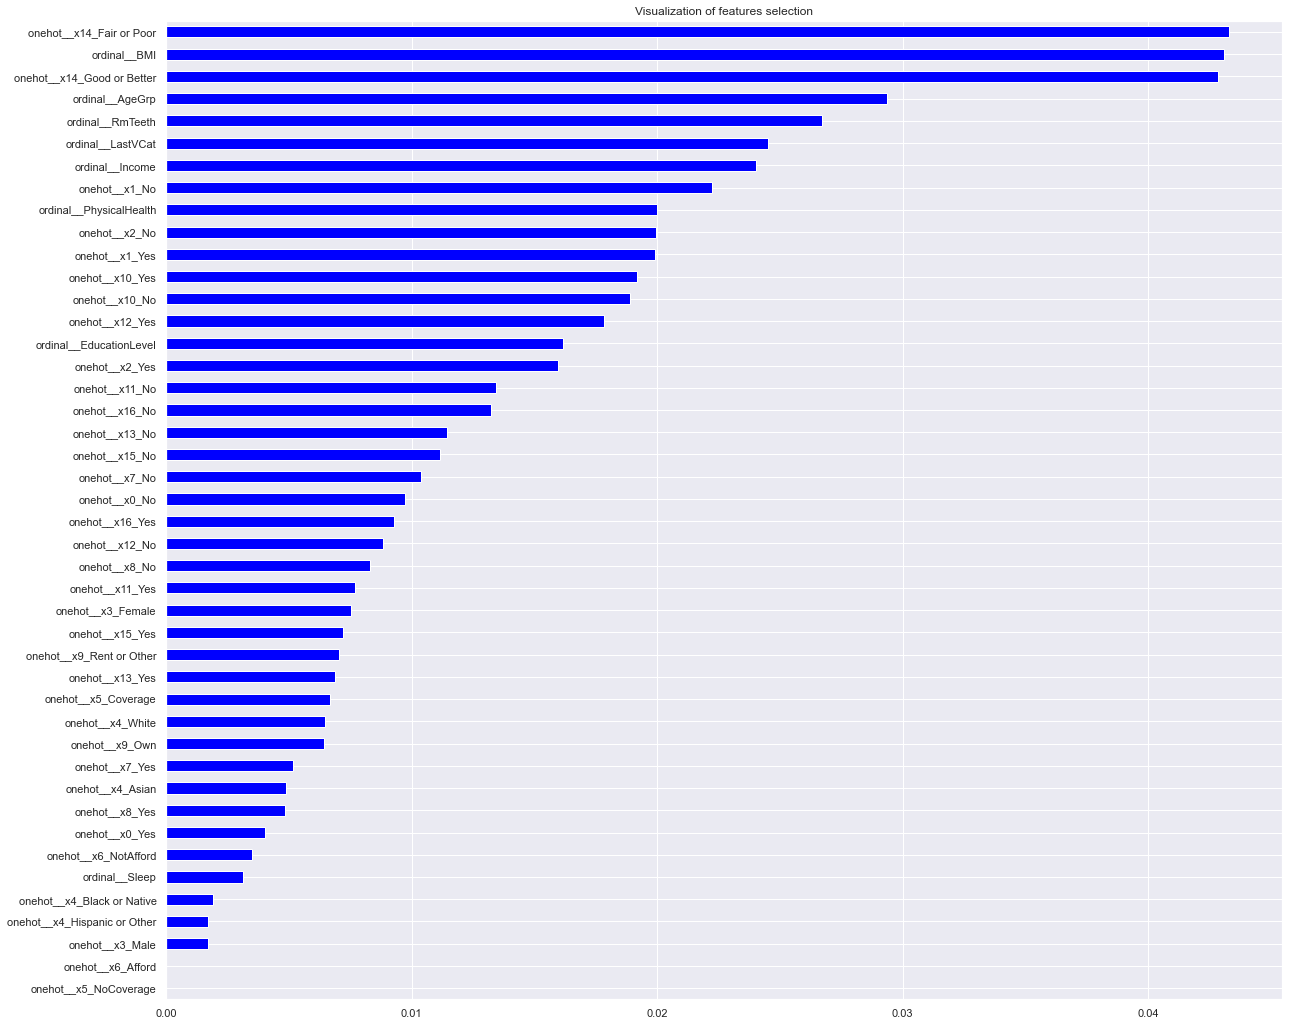

In [ ]:
# Sorting the features before plotting
plt.figure(figsize=(20,18))
namefeat.sort_values().plot.barh(color='blue')
plt.title('Visualization of features selection')
plt.show()

#### NOTE
The visualization was very important for the selectection of the variables, it makes it easy to see. I came back to this step over and over, by removing the worst performing variable one by one. I finished by retaining only 24 predictors.

#### This function get the scores 

In [ ]:
def getScore(model, X_tr, y_tr, X_t, y_t):
    # fitting the pipeline 
    pipel = make_pipeline(preprocessor, model)
    pipel.fit(X_tr, y_tr)
    y_pred = pipel.predict(X_t)
    
   
    # Computing the scores
    precision = precision_score(y_t, y_pred)*100
    recall = recall_score(y_t, y_pred)*100
    
    # To minimize the false negative we set beta = 1, that will make Recall/Sensitivity more important
    f1 = fbeta_score(y_t, y_pred, beta=1.0)*100
    
    accuracy = accuracy_score(y_t, y_pred)*100
    
    # Printing the scores
    print("="*68)
    print('Result: recall=%.2f, f1=%.2f, precision=%.2f,  accuracy=%.2f' % ( recall, f1, precision, accuracy))
    print("="*68)
    print("")
    print(plot_confusion_matrix(confusion_matrix(y_t, y_pred)))
    print(plot_roc_curve(pipel, X_t, y_t))

#### Logistic Regression

In [ ]:
logReg = LogisticRegression(random_state=0)

Result: recall=72.25, f1=45.14, precision=32.83,  accuracy=71.77

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='predicted label', ylabel='true label'>)


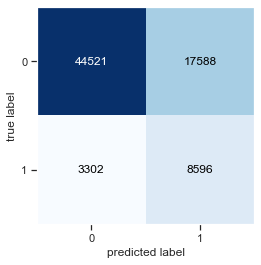

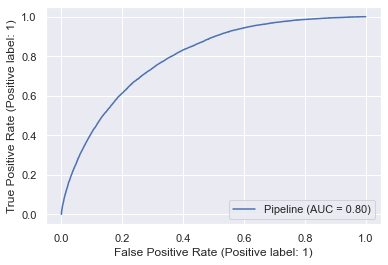

In [ ]:
mylog1 = getScore(logReg, X_train, y_train, X_test, y_test)
mylog1

#### Logistic Regression with class_weight

In [ ]:
logReg1 = LogisticRegression(random_state=0, class_weight = { 0: .4, 1: .6})

Result: recall=83.77, f1=42.19, precision=28.20,  accuracy=63.10

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='predicted label', ylabel='true label'>)


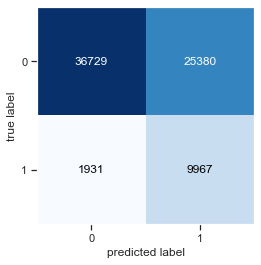

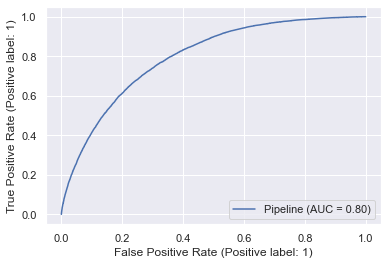

In [ ]:
getScore(logReg1, X_train, y_train, X_test, y_test)
plt.show()

#### Decision Tree

In [ ]:
dtc = DecisionTreeClassifier(random_state=0, class_weight = { 0: .45, 1: .55})

Result: recall=63.71, f1=36.06, precision=25.15,  accuracy=63.68

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='predicted label', ylabel='true label'>)


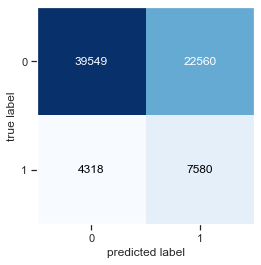

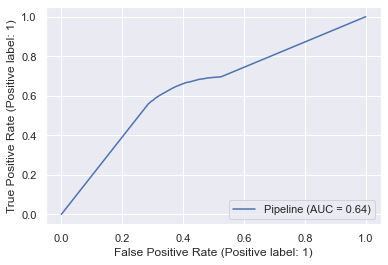

In [ ]:
getScore(dtc, X_train, y_train, X_test, y_test)

#### Random forest

In [ ]:
rf = RandomForestClassifier(random_state=0, class_weight = { 0: .45, 1: .55})

Result: recall=73.01, f1=41.62, precision=29.11,  accuracy=67.07

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='predicted label', ylabel='true label'>)


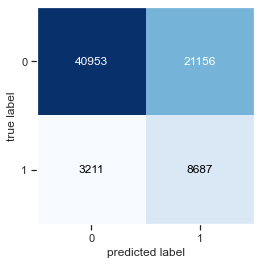

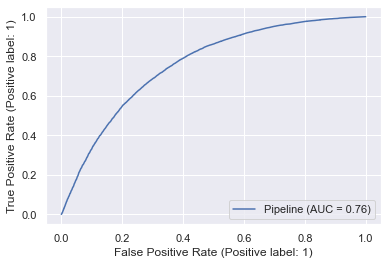

In [ ]:
getScore(rf, X_train, y_train, X_test, y_test)

#### Naive Bayes

In [ ]:
gnb = GaussianNB()

Result: recall=56.35, f1=40.99, precision=32.21,  accuracy=73.92

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='predicted label', ylabel='true label'>)


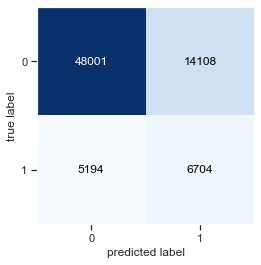

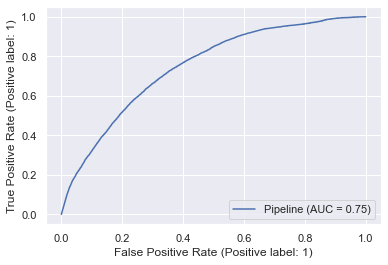

In [ ]:
getScore(gnb, X_train, y_train, X_test, y_test)

#### XGBoost

[18:12:01] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Result: recall=74.27, f1=44.52, precision=31.79,  accuracy=70.24

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='predicted label', ylabel='true label'>)


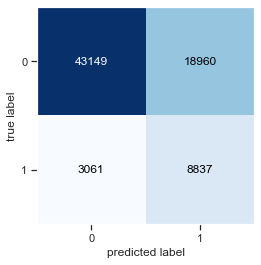

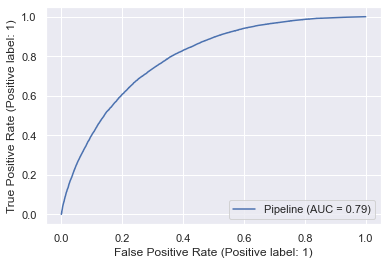

In [ ]:
xgb = XGBClassifier(objective='binary:logistic', use_label_encoder=False)
getScore(xgb, X_train, y_train, X_test, y_test)

#### KNeighborsClassifier

In [ ]:
knc = KNeighborsClassifier()

Result: recall=68.22, f1=40.18, precision=28.48,  accuracy=67.35

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='predicted label', ylabel='true label'>)


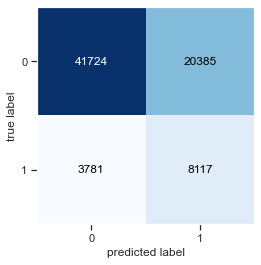

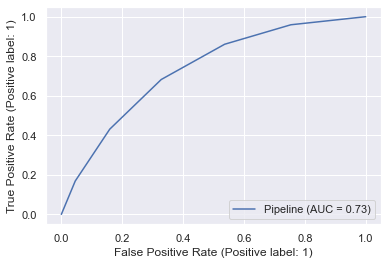

In [ ]:
getScore(knc, X_train, y_train, X_test, y_test)

#### SGD

Result: recall=83.01, f1=42.32, precision=28.40,  accuracy=63.62

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='predicted label', ylabel='true label'>)


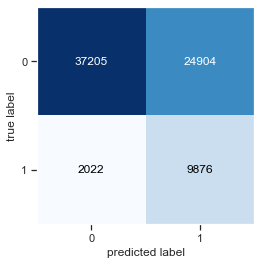

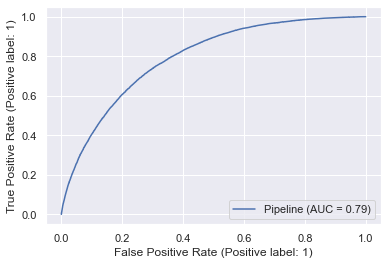

In [ ]:
sgd = SGDClassifier(loss="hinge", penalty="l2", random_state = 0)
getScore(sgd, X_train, y_train, X_test, y_test)

##### BaggingClassifier

Result: recall=83.78, f1=42.23, precision=28.23,  accuracy=63.14

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='predicted label', ylabel='true label'>)


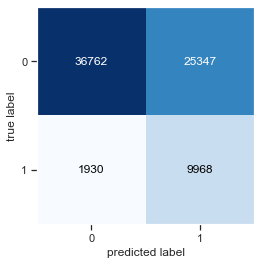

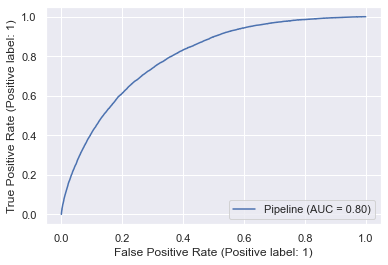

In [ ]:
bagl = BaggingClassifier(base_estimator = logReg1, n_estimators=100, bootstrap=True, random_state=0)
getScore(bagl, X_train, y_train, X_test, y_test)

##### Linear SVC

In [ ]:
svcm = LinearSVC(dual=False, random_state=0)

Result: recall=72.30, f1=45.15, precision=32.83,  accuracy=71.76

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='predicted label', ylabel='true label'>)


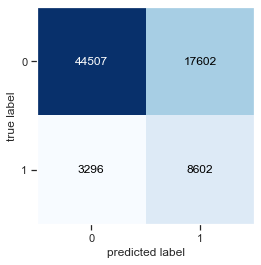

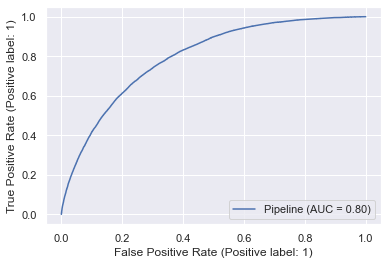

In [ ]:
getScore(svcm, X_train, y_train, X_test, y_test)

##### LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()

Result: recall=72.25, f1=45.18, precision=32.86,  accuracy=71.81

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='predicted label', ylabel='true label'>)


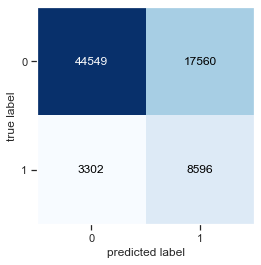

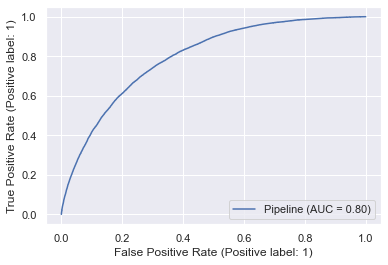

In [ ]:
getScore(lda, X_train, y_train, X_test, y_test)

##### GradientBoostingClassifier

Result: recall=74.56, f1=45.32, precision=32.56,  accuracy=71.08

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='predicted label', ylabel='true label'>)


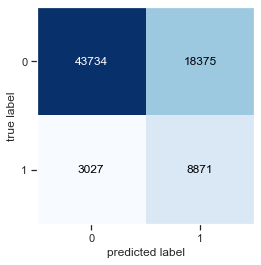

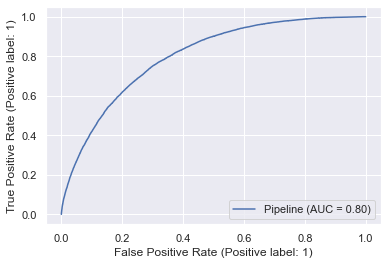

In [ ]:
gb = GradientBoostingClassifier(random_state = 0)
getScore(gb, X_train, y_train, X_test, y_test)

##### Neural Network

Result: recall=75.30, f1=44.52, precision=31.60,  accuracy=69.83

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='predicted label', ylabel='true label'>)


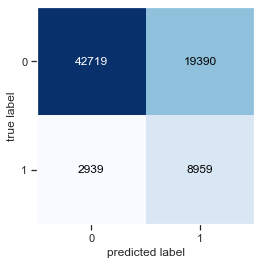

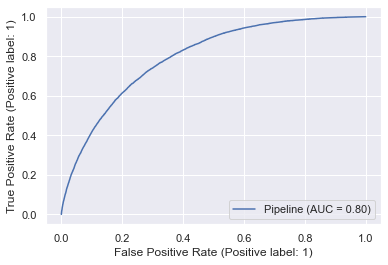

In [ ]:
clf = MLPClassifier(solver='sgd', random_state=0, activation='logistic', hidden_layer_sizes=(15,))
getScore(clf, X_train, y_train, X_test, y_test)

###                                                                           SUMMARY 

| Model                            | Recall/Sensitivity |  f1        |   AUC    | Precision | Accuracy |
|----------------------------------|--------------------|------------|----------|-----------|----------|
|__Logistic Regression__           |       72.25%       |    45.14%  |    80%   |  32.83%   |  71.77%  |
|__Logistic Regression weighted__  |     __83.77%__     |    42.19%  |    80%   |  28.20%   |  63.10%  |
|__Decision Tree__                 |       63.71%       |    36.06%  |    64%   |  25.15%   |  63.68%  |
|__Random Forest__                 |       73.01%       |    41.62%  |    76%   |  29.11%   |  67.07%  |
|__Naive Bayes__                   |       56.35%       |    40.99%  |    75%   |  32.21%   |  73.92%  |
|__KNeighborsClassifier__          |       68.22%       |    40.18%  |    73%   |  28.48%   |  67.35%  |
|__XGBoost__                       |       74.27%       |    44.52%  |    79%   |  31.79%   |  70.24%  |
|__SGD__                           |     __83.01%__     |    42.32%  |    79%   |  28.40%   |  63.62%  |
|__Bagging Classifier__            |    __83.78%__      |    42.23%  |    80%   |  28.23%   |  63.14%  |
|__Linear SVC__                    |       72.30%       |    45.15%  |    80%   |  32.83%   |  71.76%  |
|__Linear Discriminant__           |       72.25%       |    45.18%  |    80%   |  32.86%   |  71.81%  |
|__Gradient Boosting__             |    __74.56%__      |    45.32%  |    80%   |  32.56%   |  71.08%  |
|__Neural Network__                |    __75.30%__      |    44.52%  |    80%   |  31.60%   |  69.83%  |

We started with 437436 rows by 275 columns. After doing research on the risk factors for Type 2 diabetes, I selected 29 predictors. All records with missing values, such as when the respondent answer was 'I don't know', refused refused to answer, or blank was excluded from the analysis. Also people who answer been told to have diabetes and under 35 years old was excluded, because I considered someone to have Type 2 Diabetes, is when they answer yes to have been told they have diabetes, 35 years or older, and not pregnant. Then using SelectKbest for feature selection I end up selecting only 25 predictors. The dataset used for modeling has 246687 rows and 26 columns. 

The selected independent variables were:

BMI, General Health, Last routine check up, Age Group, Cardio Vascular Disease, Hours of Sleep, Physical Health, Income Level, Education Level, The number of Removed Teeth, difficulty of concentrating or focusing, Kidney Disease, Sex, Race, Insurance, Medical Affordability, Flushot, Mental Health, Housing situation, Participate in physical activity, Difficlty of seing, Having a primary care physician, Stroke, Asthma, COPD

I used 13 machine learning model classifers. Having in mind to minimize the false negative, meaning the best model will be selected based on the __sensitivity score__, then f1, AUC, Precision, and Accuracy. Based on that creteria the top 3 model are the __Bagging Classifier__ with a Sensitivity of 83.78%, the __Logistic regression__ with class weight with Sensitivity __83.77__ and the __SGD__ with a Sensitivity of __83.01__. All models have a sensitivity higher than 72% except three. The Naive Model has the worst sensitivity, but the best accuracy. After factoring interpretability and simplicity the __winner__ is the __Logistic Regression__ with class_weight.    